# Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor as XGB
from sklearn import metrics

In [2]:
%matplotlib inline

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [3]:
df = pd.read_csv("/Users/insomni_.ak/Documents/Machine Learning/GIAN_CMC/input/data_Sept_5.csv",index_col=False)

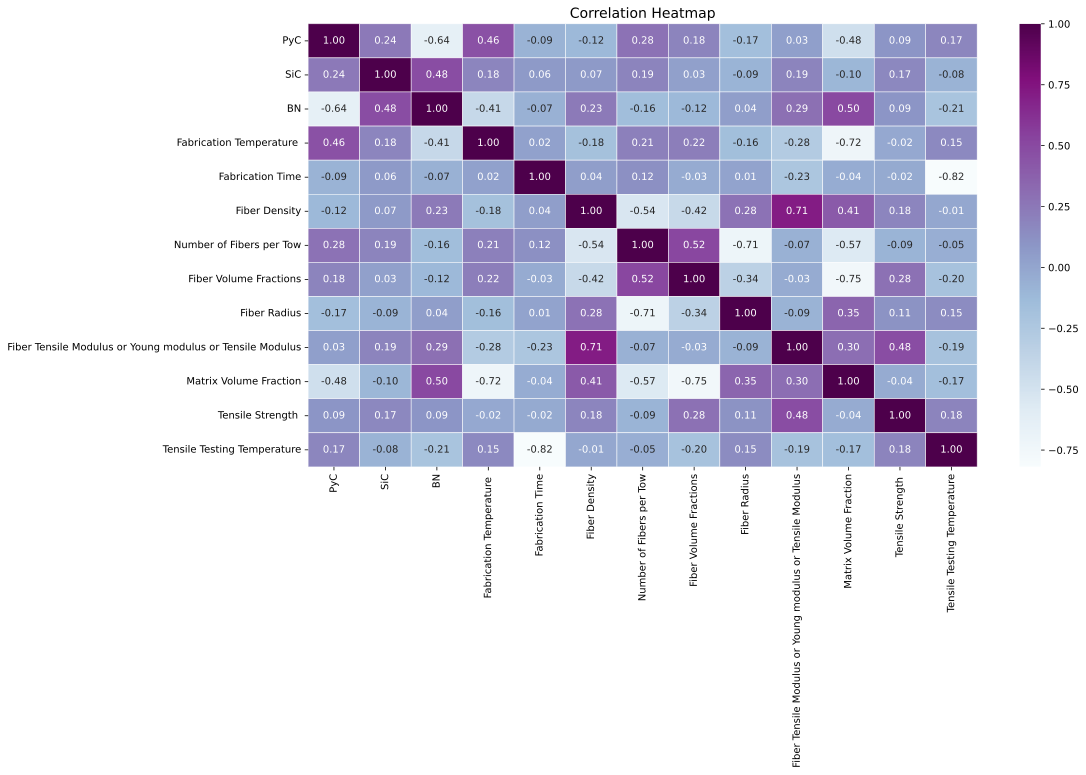

In [4]:
#  Check Correlation between the features
correlation_matrix = df.corr()

plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14)

plt.savefig('CR.png', bbox_inches='tight')

In [242]:
df.head()

,PyC,SiC,BN,Fabrication Temperature,Fabrication Time,Fiber Density,Number of Fibers per Tow,Fiber Volume Fractions,Fiber Radius,Fiber Tensile Modulus or Young modulus or Tensile Modulus,Matrix Volume Fraction,Tensile Strength,Tensile Testing Temperature
0,1,0,0,1000,NaN,2.884,500.0,0.446,6.0,NaN,0.69,950.000,900.0
1,1,0,0,1000,NaN,2.884,500.0,0.660,6.5,354.0,0.34,1200.000,20.0
2,0,0,1,1060,NaN,2.252,400.0,0.270,NaN,195.0,0.73,664.760,NaN
3,0,0,1,1400,NaN,2.900,NaN,0.270,NaN,171.0,NaN,310.798,NaN
4,1,0,0,1000,NaN,2.884,500.0,0.580,6.5,NaN,0.30,796.800,NaN


In [243]:
df.isna().sum()

PyC                                                           0
SiC                                                           0
BN                                                            0
Fabrication Temperature                                       0
Fabrication Time                                             49
Fiber Density                                                30
Number of Fibers per Tow                                     25
Fiber Volume Fractions                                        2
Fiber Radius                                                 33
Fiber Tensile Modulus or Young modulus or Tensile Modulus    33
Matrix Volume Fraction                                       37
Tensile Strength                                             14
Tensile Testing Temperature                                  37
dtype: int64

In [244]:
df

,PyC,SiC,BN,Fabrication Temperature,Fabrication Time,Fiber Density,Number of Fibers per Tow,Fiber Volume Fractions,Fiber Radius,Fiber Tensile Modulus or Young modulus or Tensile Modulus,Matrix Volume Fraction,Tensile Strength,Tensile Testing Temperature
0,1,0,0,1000,NaN,2.884,500.0,0.446,6.0,NaN,0.69,950.000,900.0
1,1,0,0,1000,NaN,2.884,500.0,0.660,6.5,354.0,0.34,1200.000,20.0
2,0,0,1,1060,NaN,2.252,400.0,0.270,NaN,195.0,0.73,664.760,NaN
3,0,0,1,1400,NaN,2.900,NaN,0.270,NaN,171.0,NaN,310.798,NaN
4,1,0,0,1000,NaN,2.884,500.0,0.580,6.5,NaN,0.30,796.800,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0,0,1,1400,7.0,NaN,500.0,0.460,NaN,NaN,0.54,NaN,NaN
105,1,0,0,950,7.0,NaN,500.0,0.540,NaN,NaN,0.46,NaN,NaN
106,1,0,0,950,7.0,NaN,500.0,0.500,NaN,NaN,0.50,NaN,NaN
107,1,0,0,950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
# saving the feature names into a list
f_name=list(df.columns)
lenn=len(f_name)

for i in range(0,lenn):
    print(i, " = ",f_name[i])

0  =  PyC
1  =  SiC
2  =  BN
3  =  Fabrication Temperature 
4  =  Fabrication Time
5  =  Fiber Density
6  =  Number of Fibers per Tow
7  =  Fiber Volume Fractions
8  =  Fiber Radius
9  =  Fiber Tensile Modulus or Young modulus or Tensile Modulus
10  =  Matrix Volume Fraction
11  =  Tensile Strength 
12  =  Tensile Testing Temperature


In [246]:
#renaming features
df = df.rename(columns={'Fiber Tensile Modulus or Young modulus or Tensile Modulus': 'Fiber Modulus', 
                        'Tensile Strength ': 'Strength',
                        }
              )

In [247]:
print(df.keys())

Index(['PyC', 'SiC', 'BN', 'Fabrication Temperature ', 'Fabrication Time',
       'Fiber Density', 'Number of Fibers per Tow', 'Fiber Volume Fractions',
       'Fiber Radius', 'Fiber Modulus', 'Matrix Volume Fraction', 'Strength',
       'Tensile Testing Temperature'],
      dtype='object')


In [248]:
df.shape

(109, 13)

In [249]:
# Check the missing values
df.isnull().sum().sort_values(ascending=False)

Fabrication Time               49
Matrix Volume Fraction         37
Tensile Testing Temperature    37
Fiber Radius                   33
Fiber Modulus                  33
Fiber Density                  30
Number of Fibers per Tow       25
Strength                       14
Fiber Volume Fractions          2
PyC                             0
SiC                             0
BN                              0
Fabrication Temperature         0
dtype: int64

In [250]:
df = df.dropna(axis=0, how='any',subset=["Strength"])

In [251]:
df.shape

(95, 13)

In [252]:
# saving the feature names into a list
f_name=list(df.columns)
lenn=len(f_name)

for i in range(0,lenn):
    print(i, " = ",f_name[i])

0  =  PyC
1  =  SiC
2  =  BN
3  =  Fabrication Temperature 
4  =  Fabrication Time
5  =  Fiber Density
6  =  Number of Fibers per Tow
7  =  Fiber Volume Fractions
8  =  Fiber Radius
9  =  Fiber Modulus
10  =  Matrix Volume Fraction
11  =  Strength
12  =  Tensile Testing Temperature


In [253]:
# Check the missing values
df.isnull().sum().sort_values(ascending=False)

Fabrication Time               40
Matrix Volume Fraction         32
Tensile Testing Temperature    28
Fiber Modulus                  23
Fiber Radius                   22
Number of Fibers per Tow       21
Fiber Density                  18
PyC                             0
SiC                             0
BN                              0
Fabrication Temperature         0
Fiber Volume Fractions          0
Strength                        0
dtype: int64

In [265]:
missing_percentage = df.isnull().mean().sort_values(ascending=False) * 100

In [266]:
missing_percentage[0:]

Fabrication Time               42.105263
Matrix Volume Fraction         33.684211
Tensile Testing Temperature    29.473684
Fiber Modulus                  24.210526
Fiber Radius                   23.157895
Number of Fibers per Tow       22.105263
Fiber Density                  18.947368
PyC                             0.000000
SiC                             0.000000
BN                              0.000000
Fabrication Temperature         0.000000
Fiber Volume Fractions          0.000000
Strength                        0.000000
dtype: float64

In [261]:
# Define an RGB color (for example, a shade of blue)
rgb_color = (186/255, 112/255, 79/255)  # RGB values normalized between 0 and 1

# Create a uniform color palette
palette = [rgb_color] * 13

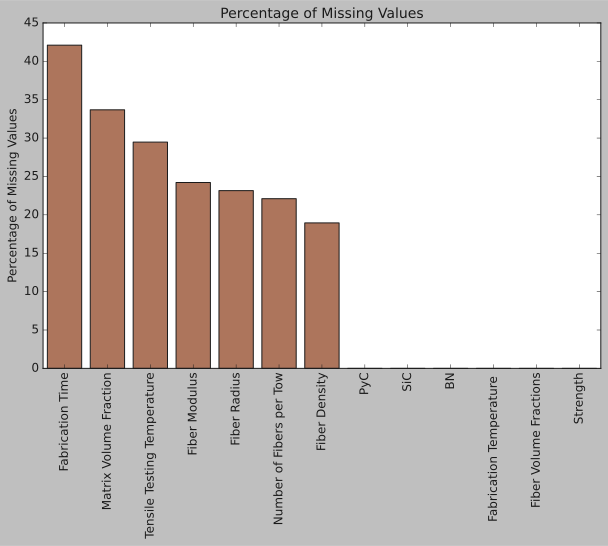

In [267]:
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette=palette)
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values',fontsize=14)
plt.savefig('FV.png', bbox_inches='tight', dpi=1200)
plt.show()

In [158]:
df = df.drop(columns=["Fabrication Time","Matrix Volume Fraction"])

In [159]:
df.shape

(95, 11)

In [160]:
# checking the number of rows and columns
df.shape

(95, 11)

In [161]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 102
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PyC                          95 non-null     int64  
 1   SiC                          95 non-null     int64  
 2   BN                           95 non-null     int64  
 3   Fabrication Temperature      95 non-null     int64  
 4   Fiber Density                77 non-null     float64
 5   Number of Fibers per Tow     74 non-null     float64
 6   Fiber Volume Fractions       95 non-null     float64
 7   Fiber Radius                 73 non-null     float64
 8   Fiber Modulus                72 non-null     float64
 9   Strength                     95 non-null     float64
 10  Tensile Testing Temperature  67 non-null     float64
dtypes: float64(7), int64(4)
memory usage: 8.9 KB


In [162]:
df.isnull().sum()

PyC                             0
SiC                             0
BN                              0
Fabrication Temperature         0
Fiber Density                  18
Number of Fibers per Tow       21
Fiber Volume Fractions          0
Fiber Radius                   22
Fiber Modulus                  23
Strength                        0
Tensile Testing Temperature    28
dtype: int64

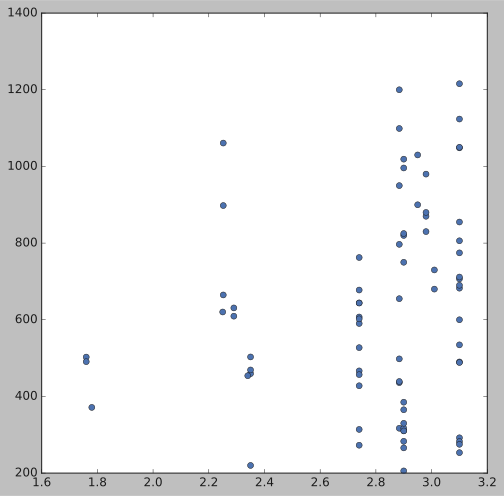

In [163]:
plt.figure(figsize=(8, 8))
plt.plot(df['Fiber Density'], df['Strength'], 'bo');


## Handling Missing values



In [164]:
t=int(input("1 for mean, 2 for -1, 3 for KNeighborsRegressor: "))
if(t==1):
    print("Opted for mean\n")
    df.fillna(df.mean(),inplace=True)
elif(t==2):
    print("Opted for -1\n")
    df.fillna(value=-1,inplace=True)
else:
    print("Opted for KNeighborsRegressor\n")
    from sklearn.neighbors import KNeighborsRegressor

# function that imputes a dataframe 
    def impute_knn(df):
    
        ''' inputs: pandas df containing feature matrix '''
        ''' outputs: dataframe with NaN imputed '''
        # imputation with KNN unsupervised method

        # separate dataframe into numerical/categorical
        ldf = df.select_dtypes(include=[np.number])           # select numerical columns in df
        ldf_putaside = df.select_dtypes(exclude=[np.number])  # select categorical columns in df
        # define columns w/ and w/o missing data
        cols_nan = ldf.columns[ldf.isna().any()].tolist()         # columns w/ nan 
        cols_no_nan = ldf.columns.difference(cols_nan).values     # columns w/o nan 

        for col in cols_nan:                
            imp_test = ldf[ldf[col].isna()]   # indicies which have missing data will become our test set
            imp_train = ldf.dropna()          # all indicies which which have no missing data 
            model = KNeighborsRegressor(n_neighbors=5)  # KNR Unsupervised Approach
            knr = model.fit(imp_train[cols_no_nan], imp_train[col])
            ldf.loc[df[col].isna(), col] = knr.predict(imp_test[cols_no_nan])
    
        return pd.concat([ldf,ldf_putaside],axis=1)
    # Call function that imputes missing data
    df = impute_knn(df)
    

Opted for KNeighborsRegressor



In [165]:
df.shape

(95, 11)

In [166]:
df.head()

,PyC,SiC,BN,Fabrication Temperature,Fiber Density,Number of Fibers per Tow,Fiber Volume Fractions,Fiber Radius,Fiber Modulus,Strength,Tensile Testing Temperature
0,1,0,0,1000,2.884,500.0,0.446,6.000,375.0,950.000,900.0
1,1,0,0,1000,2.884,500.0,0.660,6.500,354.0,1200.000,20.0
2,0,0,1,1060,2.252,400.0,0.270,5.640,195.0,664.760,20.0
3,0,0,1,1400,2.900,500.0,0.270,6.034,171.0,310.798,20.0
4,1,0,0,1000,2.884,500.0,0.580,6.500,354.6,796.800,20.0


In [167]:
df.isnull().sum().sort_values(ascending=False)

PyC                            0
SiC                            0
BN                             0
Fabrication Temperature        0
Fiber Density                  0
Number of Fibers per Tow       0
Fiber Volume Fractions         0
Fiber Radius                   0
Fiber Modulus                  0
Strength                       0
Tensile Testing Temperature    0
dtype: int64

In [168]:
df.shape

(95, 11)

In [169]:
df.to_csv('out_sept_06.csv', index=False)

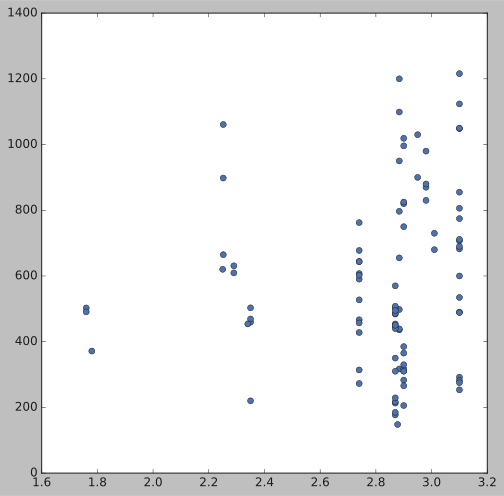

In [170]:
plt.figure(figsize=(8, 8))
plt.plot(df['Fiber Density'], df['Strength'], 'bo');

In [171]:
f_name=list(df.columns)
train=[x for i,x in enumerate(f_name) if i!=9]
test=f_name[9]
print(test)

Strength


In [172]:
train
test

'Strength'

In [173]:
df.head()

,PyC,SiC,BN,Fabrication Temperature,Fiber Density,Number of Fibers per Tow,Fiber Volume Fractions,Fiber Radius,Fiber Modulus,Strength,Tensile Testing Temperature
0,1,0,0,1000,2.884,500.0,0.446,6.000,375.0,950.000,900.0
1,1,0,0,1000,2.884,500.0,0.660,6.500,354.0,1200.000,20.0
2,0,0,1,1060,2.252,400.0,0.270,5.640,195.0,664.760,20.0
3,0,0,1,1400,2.900,500.0,0.270,6.034,171.0,310.798,20.0
4,1,0,0,1000,2.884,500.0,0.580,6.500,354.6,796.800,20.0


In [174]:
#export the predicted df to csv
df.to_csv("../input/knnimputer_db.csv",index=False)

/var/folders/zl/0855x5b97yl88k0wt308xr580000gn/T/ipykernel_72150/3586946306.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Strength'])


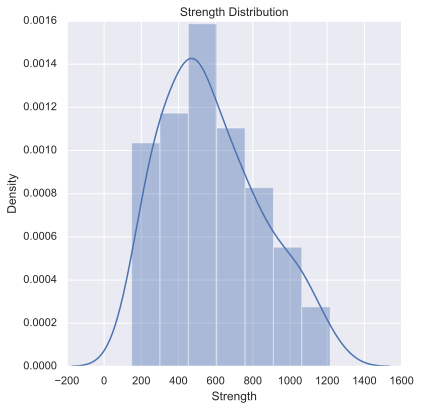

In [175]:
# distribution of strength value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Strength'])
plt.title('Strength Distribution')
plt.show()

/var/folders/zl/0855x5b97yl88k0wt308xr580000gn/T/ipykernel_72150/3700156843.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fiber Density'])


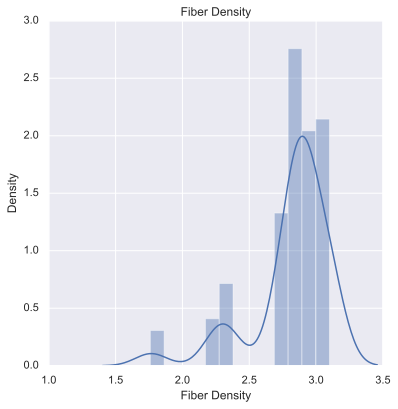

In [176]:
# distribution of strength value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Fiber Density'])
plt.title('Fiber Density')
plt.show()

/var/folders/zl/0855x5b97yl88k0wt308xr580000gn/T/ipykernel_72150/2566624361.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fiber Volume Fractions'])


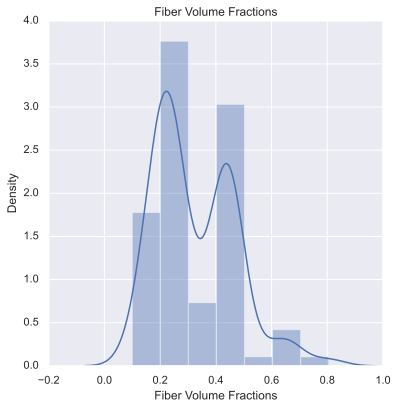

In [177]:
# distribution of strength value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Fiber Volume Fractions'])
plt.title('Fiber Volume Fractions')
plt.show()

/var/folders/zl/0855x5b97yl88k0wt308xr580000gn/T/ipykernel_72150/3697658870.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fabrication Temperature '])


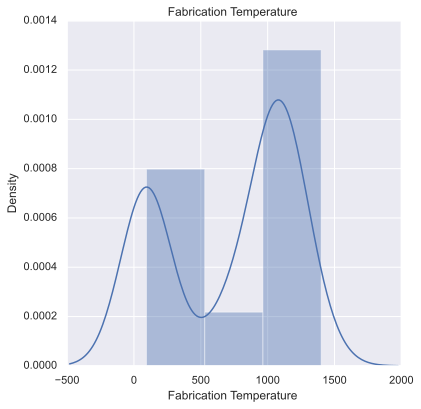

In [178]:
# distribution of strength value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Fabrication Temperature '])
plt.title('Fabrication Temperature ')
plt.show()

## Correlation

In [179]:
''' Function to plot correlation of features '''
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(6,6))
    mask = np.zeros_like(corr_mat,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0, 
                cmap='plasma',square=False,lw=2,annot=True,cbar=False);plt.show()  

/var/folders/zl/0855x5b97yl88k0wt308xr580000gn/T/ipykernel_72150/3929055914.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_mat,dtype=np.bool)


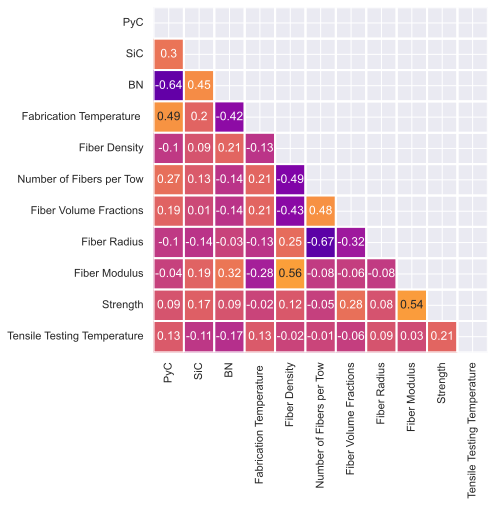

In [180]:
corrMat(df)

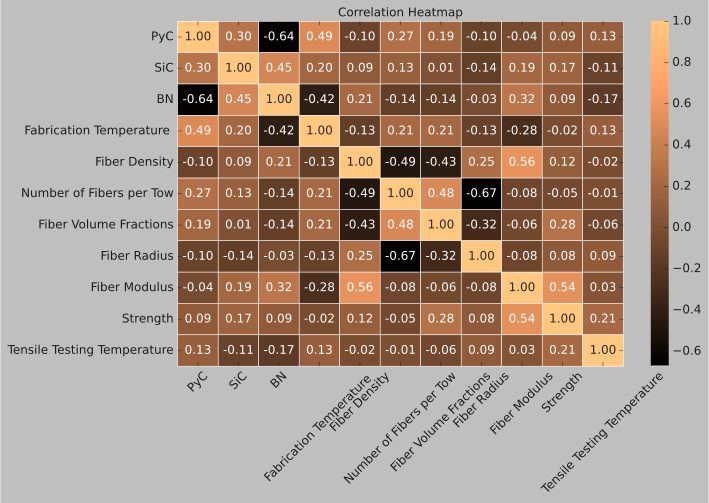

In [237]:
# #  Check Correlation between the features
# correlation_matrix = df.corr()

# plt.figure(figsize=(10,6))
# font_size = 12
# font = {'size' : font_size}
# plt.rc('font', **font)
# sns.heatmap(correlation_matrix, annot=True, cmap='copper', fmt='.2f', linewidths=0.5)
# plt.title('Correlation Heatmap', fontsize=font_size)
# plt.xticks(roa
#            \) # for x-axis
# # plt.yticks(fontsize=font_size) # for y-axis
# plt.savefig('CR.png', bbox_inches='tight', dpi=1200)

In [182]:
correlation_matrix

,PyC,SiC,BN,Fabrication Temperature,Fiber Density,Number of Fibers per Tow,Fiber Volume Fractions,Fiber Radius,Fiber Modulus,Strength,Tensile Testing Temperature
PyC,1.000000,0.295401,-0.639228,0.488148,-0.099549,0.274504,0.188481,-0.104117,-0.043650,0.094733,0.128804
SiC,0.295401,1.000000,0.454892,0.195293,0.087743,0.133940,0.012124,-0.139916,0.192591,0.168485,-0.113376
BN,-0.639228,0.454892,1.000000,-0.422713,0.211211,-0.140158,-0.140217,-0.030798,0.318169,0.092676,-0.173313
Fabrication Temperature,0.488148,0.195293,-0.422713,1.000000,-0.134930,0.206572,0.209846,-0.127418,-0.278634,-0.019577,0.127637
Fiber Density,-0.099549,0.087743,0.211211,-0.134930,1.000000,-0.486627,-0.429303,0.252860,0.558401,0.124403,-0.021095
Number of Fibers per Tow,0.274504,0.133940,-0.140158,0.206572,-0.486627,1.000000,0.478367,-0.671823,-0.079088,-0.051701,-0.009688
Fiber Volume Fractions,0.188481,0.012124,-0.140217,0.209846,-0.429303,0.478367,1.000000,-0.315323,-0.062836,0.282994,-0.064786
Fiber Radius,-0.104117,-0.139916,-0.030798,-0.127418,0.252860,-0.671823,-0.315323,1.000000,-0.079302,0.080403,0.093288
Fiber Modulus,-0.043650,0.192591,0.318169,-0.278634,0.558401,-0.079088,-0.062836,-0.079302,1.000000,0.541187,0.032884
Strength,0.094733,0.168485,0.092676,-0.019577,0.124403,-0.051701,0.282994,0.080403,0.541187,1.000000,0.213644


In [183]:
X = df[train]
Y = df[test]

In [184]:
train

['PyC',
 'SiC',
 'BN',
 'Fabrication Temperature ',
 'Fiber Density',
 'Number of Fibers per Tow',
 'Fiber Volume Fractions',
 'Fiber Radius',
 'Fiber Modulus',
 'Tensile Testing Temperature']

In [185]:
print(X)

     PyC  SiC  BN  Fabrication Temperature   Fiber Density  \
0      1    0   0                      1000         2.8840   
1      1    0   0                      1000         2.8840   
2      0    0   1                      1060         2.2520   
3      0    0   1                      1400         2.9000   
4      1    0   0                      1000         2.8840   
..   ...  ...  ..                       ...            ...   
98     1    0   0                      1300         2.8696   
99     1    0   0                      1300         2.8696   
100    1    0   0                      1300         2.8696   
101    1    0   0                      1300         2.8696   
102    0    0   1                      1050         2.8696   

     Number of Fibers per Tow  Fiber Volume Fractions  Fiber Radius  \
0                       500.0                   0.446         6.000   
1                       500.0                   0.660         6.500   
2                       400.0             

In [186]:
print(Y)

0       950.000
1      1200.000
2       664.760
3       310.798
4       796.800
         ...   
98      507.800
99      494.700
100     310.000
101     440.000
102     450.000
Name: Strength, Length: 95, dtype: float64


In [187]:
import pandas as pd
from sklearn import tree
from sklearn import ensemble
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import AdaBoostRegressor as ABR
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNR
from xgboost import XGBRegressor as XGB
from sklearn.tree import ExtraTreeRegressor as ETR

In [188]:
df.shape

(95, 11)

In [189]:
X

,PyC,SiC,BN,Fabrication Temperature,Fiber Density,Number of Fibers per Tow,Fiber Volume Fractions,Fiber Radius,Fiber Modulus,Tensile Testing Temperature
0,1,0,0,1000,2.8840,500.0,0.446,6.000,375.0,900.0
1,1,0,0,1000,2.8840,500.0,0.660,6.500,354.0,20.0
2,0,0,1,1060,2.2520,400.0,0.270,5.640,195.0,20.0
3,0,0,1,1400,2.9000,500.0,0.270,6.034,171.0,20.0
4,1,0,0,1000,2.8840,500.0,0.580,6.500,354.6,20.0
...,...,...,...,...,...,...,...,...,...,...
98,1,0,0,1300,2.8696,720.0,0.450,6.714,206.0,176.0
99,1,0,0,1300,2.8696,720.0,0.450,6.714,206.0,176.0
100,1,0,0,1300,2.8696,500.0,0.100,7.000,200.0,20.0
101,1,0,0,1300,2.8696,500.0,0.160,6.500,280.0,176.0


In [190]:
# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [191]:
# loading the linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)


LinearRegression()

In [192]:
training_data_prediction = lin_reg_model.predict(X_train)

In [193]:
training_data_prediction = lin_reg_model.predict(X_train)

In [194]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5893994158300571


In [195]:
test_data_prediction = lin_reg_model.predict(X_test)

In [196]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.057800417344402666


In [206]:
# Extra Tree model
model = RandomForestRegressor(
        bootstrap=True, 
        ccp_alpha=0.0, 
        criterion='squared_error', 
        max_depth=None, 
        max_features=1.0,
        max_leaf_nodes=None,
        max_samples=None,
        min_impurity_decrease=0.0,
        min_samples_leaf=1,
        min_samples_split=2,
        min_weight_fraction_leaf=0.0,
        n_estimators=100,
        n_jobs=-1,
        oob_score=False,
        random_state=123,
        verbose=0,
        warm_start=False
)
#np.random.seed(678)
model.fit(X_train,Y_train)
training_data_prediction = model.predict(X_train)
train_error_score = metrics.r2_score(Y_train, training_data_prediction)
test_data_prediction = model.predict(X_test)
test_error_score = metrics.r2_score(Y_test, test_data_prediction)
print(f"Train R2:{train_error_score}, Test R2:{test_error_score}")



Train R2:0.9519082527341666, Test R2:0.6713984214361131


In [209]:
importances = model.feature_importances_

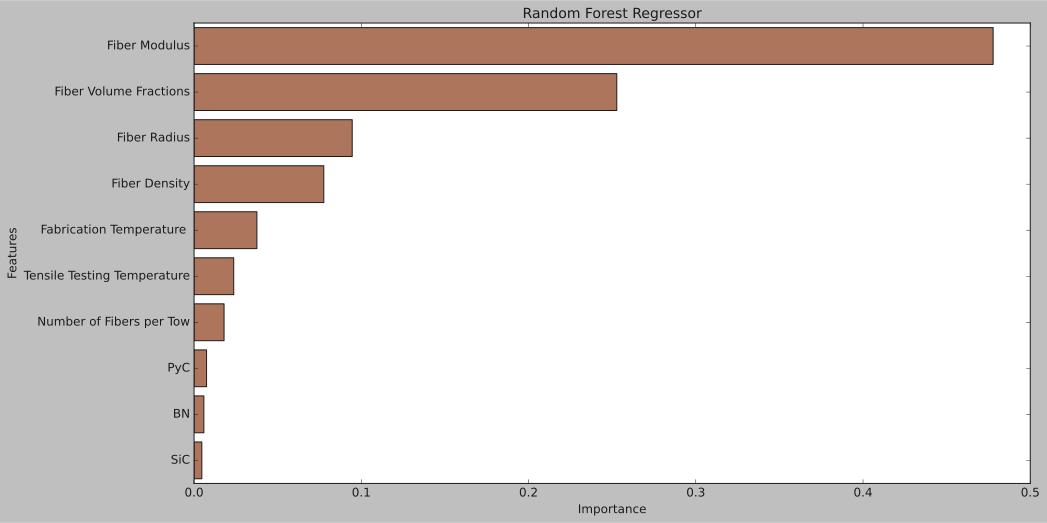

In [220]:
feature_names = X_train.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot
# Define an RGB color (for example, a shade of blue)
rgb_color = (186/255, 112/255, 79/255)  # RGB values normalized between 0 and 1

# Create a uniform color palette
palette = [rgb_color] * len(feature_importances)

plt.figure(figsize=(15,8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette=palette)
plt.title('Random Forest Regressor',fontsize=14)
plt.xlabel('Importance')
plt.ylabel('Features')

plt.savefig('FI.png', bbox_inches='tight', dpi=300)
plt.show()

#sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt='.2f', linewidths=0.5)
#plt.title('Correlation Heatmap', fontsize=14)


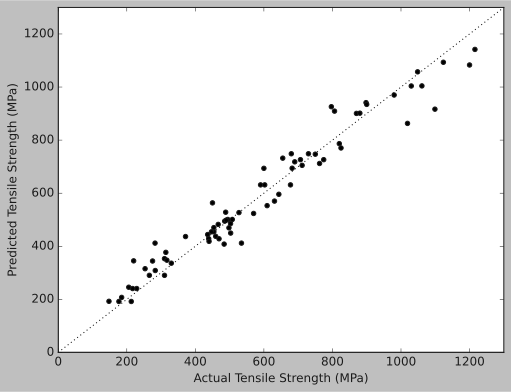

In [205]:
fig = plt.figure()
plt.style.use('classic')
plt.scatter(Y_train, training_data_prediction,c="black")
plt.plot([0,1300],[0,1300],linestyle="dotted",c="black")
plt.xlabel("Actual Tensile Strength (MPa)")
plt.ylabel("Predicted Tensile Strength (MPa)")
plt.grid(False)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.xlim((0, 1300))
plt.ylim((0, 1300))
plt.savefig("Actual vs Predicted (Train).png",dpi=300)
plt.show()

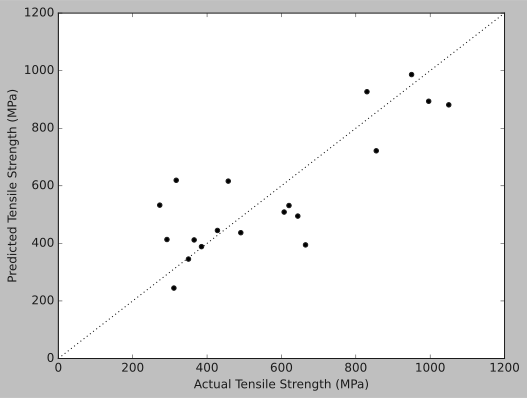

In [199]:
fig = plt.figure()
plt.style.use('classic')
plt.scatter(Y_test, test_data_prediction,c="black")
plt.plot([0,1300],[0,1300],linestyle="dotted",c="black")
plt.xlabel("Actual Tensile Strength (MPa)")
plt.ylabel("Predicted Tensile Strength (MPa)")
plt.grid(False)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.xlim((0, 1200))
plt.ylim((0, 1200))
plt.savefig("Actual vs Predicted (Test).png",dpi=300)
plt.show()

In [200]:
print(np.median(Y_train))
print(np.median(training_data_prediction))
print(np.median(Y_test))
print(np.median(test_data_prediction))

505.41499999999996
512.3174333333334
490.7
508.82699999999926


In [201]:
print(np.mean(Y_train))
print(np.mean(Y_test))

580.0019736842105
572.9356842105263


In [202]:
best = 0
max_e = 0
for i in range(1,1234):
    model = ABR()
    np.random.seed(i)
    model.fit(X_train,Y_train)
    training_data_prediction = model.predict(X_train)
    train_error_score = metrics.r2_score(Y_train, training_data_prediction)
    test_data_prediction = model.predict(X_test)
    test_error_score = metrics.r2_score(Y_test, test_data_prediction)
    print(f"Train R2:{train_error_score}, Test R2:{test_error_score}")

    if test_error_score > max_e:
        max_e = test_error_score
        best = i

print(best, max_e)
        


Train R2:0.8949728366713833, Test R2:0.5794928151660721
Train R2:0.8955592346935632, Test R2:0.6838074265924001
Train R2:0.8937597890522717, Test R2:0.6442636918043929
Train R2:0.8953573425861273, Test R2:0.6328945965969528
Train R2:0.8777179096674721, Test R2:0.7188345343871583
Train R2:0.8905265376328522, Test R2:0.6341375299773675
Train R2:0.8757866838584234, Test R2:0.649038481346933
Train R2:0.891810990085385, Test R2:0.6190293487938772
Train R2:0.8861429575013422, Test R2:0.6265854467041045
Train R2:0.8834426966365211, Test R2:0.6272093244056784
Train R2:0.8846543329087239, Test R2:0.6844087069059586
Train R2:0.8891445409051033, Test R2:0.5505830946953725
Train R2:0.8957531700455872, Test R2:0.6675441186717147
Train R2:0.9020380116954394, Test R2:0.6349997249585223
Train R2:0.8907618855713582, Test R2:0.6528234939466442
Train R2:0.8990037933777258, Test R2:0.6443450693436619
Train R2:0.9069298497127557, Test R2:0.6313550147473486
Train R2:0.8877070643723056, Test R2:0.69579112649

In [203]:
from sklearn.model_selection import cross_val_score

summ_train = 0
summ_test = 0
# Extra Tree model
for i in range(100):
    ada = sum(cross_val_score(RandomForestRegressor(
        bootstrap=True, 
        ccp_alpha=0.0, 
        criterion='squared_error', 
        max_depth=None, 
        max_features=1.0,
        max_leaf_nodes=None,
        max_samples=None,
        min_impurity_decrease=0.0,
        min_samples_leaf=1,
        min_samples_split=2,
        min_weight_fraction_leaf=0.0,
        n_estimators=100,
        n_jobs=-1,
        oob_score=False,
        random_state=123,
        verbose=0,
        warm_start=False
        ),X,Y,cv=5))/5
    summ_train = summ_train + ada

print(summ_train/100)


KeyboardInterrupt: 

In [ ]:

summ_train = 0
summ_test = 0
# Extra Tree model
for i in range(100):
    model = ABR()
    model.fit(X_train,Y_train)
    training_data_prediction = model.predict(X_train)
    train_error_score = metrics.r2_score(Y_train, training_data_prediction)
    test_data_prediction = model.predict(X_test)
    test_error_score = metrics.r2_score(Y_test, test_data_prediction)
    #print(f"Train R2:{train_error_score}, Test R2:{test_error_score}")
    summ_train = summ_train + train_error_score
    summ_test  = summ_test + test_error_score

print(summ_train/100,summ_test/100)



In [ ]:
# Extra Tree model
model = XGB()
model.fit(X_train,Y_train)
training_data_prediction = model.predict(X_train)
train_error_score = metrics.r2_score(Y_train, training_data_prediction)
test_data_prediction = model.predict(X_test)
test_error_score = metrics.r2_score(Y_test, test_data_prediction)
print(f"Train R2:{train_error_score}, Test R2:{test_error_score}")

In [ ]:
# Extra Tree model
model = XGB()
model.fit(X_train,Y_train)
training_data_prediction = model.predict(X_train)
train_error_score = metrics.r2_score(Y_train, training_data_prediction)
test_data_prediction = model.predict(X_test)
test_error_score = metrics.r2_score(Y_test, test_data_prediction)
print(f"Train R2:{train_error_score}, Test R2:{test_error_score}")

In [ ]:
# Extra Tree model
model = ABR()
model.fit(X_train,Y_train)
training_data_prediction = model.predict(X_train)
train_error_score = metrics.r2_score(Y_train, training_data_prediction)
test_data_prediction = model.predict(X_test)
test_error_score = metrics.r2_score(Y_test, test_data_prediction)
print(f"Train R2:{train_error_score}, Test R2:{test_error_score}")

In [ ]:
# Extra Tree model
model = GBR()
model.fit(X_train,Y_train)
training_data_prediction = model.predict(X_train)
train_error_score = metrics.r2_score(Y_train, training_data_prediction)
test_data_prediction = model.predict(X_test)
test_error_score = metrics.r2_score(Y_test, test_data_prediction)
print(f"Train R2:{train_error_score}, Test R2:{test_error_score}")

In [ ]:
# Extra Tree model
model = GBR()
model.fit(X_train,Y_train)
training_data_prediction = model.predict(X_train)
train_error_score = metrics.r2_score(Y_train, training_data_prediction)
test_data_prediction = model.predict(X_test)
test_error_score = metrics.r2_score(Y_test, test_data_prediction)
print(f"Train R2:{train_error_score}, Test R2:{test_error_score}")

In [ ]:
# Extra Tree model
model = KNR()
model.fit(X_train,Y_train)
training_data_prediction = model.predict(X_train)
train_error_score = metrics.r2_score(Y_train, training_data_prediction)
test_data_prediction = model.predict(X_test)
test_error_score = metrics.r2_score(Y_test, test_data_prediction)
print(f"Train R2:{train_error_score}, Test R2:{test_error_score}")

In [ ]:
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE regressor
smote = SMOTE()

# Fit the SMOTE regressor to the data and generate synthetic samples
X_oversampled, y_oversampled = smote.fit_resample(X, Y)

# Print the shape of the original and oversampled data
print("Original Data:", X.shape, Y.shape)
print("Oversampled Data:", X_oversampled.shape, y_oversampled.shape)


# Loss Curve Plotting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load and preprocess the data
# Assume X and y are your input features and target variable, respectively

scaler = MinMaxScaler()
df_1 = pd.read_csv("../input/knnimputer_db.csv")
df = pd.DataFrame(scaler.fit_transform(df_1),columns=df_1.columns)

X = df.drop("Strength", axis=1).values
y = df.Strength.values


# Step 2: Initialize the model
model = ExtraTreesRegressor()

# Step 3: Perform cross-validation
num_epochs = 100
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    fold_train_losses = []
    fold_val_losses = []
    
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Compute train loss
        y_train_pred = model.predict(X_train)
        train_mse = np.mean((y_train_pred - y_train) ** 2)
        fold_train_losses.append(train_mse)
        
        # Compute validation loss
        y_val_pred = model.predict(X_val)
        val_mse = np.mean((y_val_pred - y_val) ** 2)
        fold_val_losses.append(val_mse)
    
    # Average the losses across folds
    avg_train_loss = np.mean(fold_train_losses)
    avg_val_loss = np.mean(fold_val_losses)
    
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    
    # Print the current epoch and corresponding loss
    print(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Val Loss = {avg_val_loss:.4f}")

# Step 4: Plot the train and validation loss curves
epochs = range(1, num_epochs + 1)

plt.plot(epochs, train_losses, 'b', label='Training Loss')
plt.plot(epochs, val_losses, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
print(X.head())

In [153]:
df.head()

,PyC,SiC,BN,Fabrication Temperature,Fiber Density,Number of Fibers per Tow,Fiber Volume Fractions,Fiber Radius,Fiber Modulus,Strength,Tensile Testing Temperature
0,1,0,0,1000,2.884,500.0,0.446,6.000,375.0,950.000,900.0
1,1,0,0,1000,2.884,500.0,0.660,6.500,354.0,1200.000,20.0
2,0,0,1,1060,2.252,400.0,0.270,5.640,195.0,664.760,20.0
3,0,0,1,1400,2.900,500.0,0.270,6.034,171.0,310.798,20.0
4,1,0,0,1000,2.884,500.0,0.580,6.500,354.6,796.800,20.0


In [158]:
df[(df["Strength"] > 600) & (df["Strength"] < 800)]

,PyC,SiC,BN,Fabrication Temperature,Fiber Density,Number of Fibers per Tow,Fiber Volume Fractions,Fiber Radius,Fiber Modulus,Strength,Tensile Testing Temperature
2,0,0,1,1060,2.252,400.0,0.270,5.64,195.0,664.76,20.0
4,1,0,0,1000,2.884,500.0,0.580,6.50,354.6,796.80,20.0
11,1,0,0,700,2.884,500.0,0.160,6.24,313.2,655.00,950.0
19,1,0,0,1000,3.010,800.0,0.430,5.00,312.0,680.00,20.0
20,1,0,0,1000,3.010,800.0,0.430,5.00,312.0,730.00,20.0
21,1,0,0,1000,2.740,500.0,0.258,7.00,270.0,644.00,20.0
25,0,0,1,94,2.740,500.0,0.220,7.00,270.0,607.27,20.0
29,0,0,1,94,2.740,500.0,0.260,7.00,270.0,643.64,20.0
30,0,0,1,94,2.740,500.0,0.410,7.00,270.0,762.42,20.0
31,0,0,1,94,2.740,500.0,0.430,7.00,270.0,677.58,20.0


In [159]:
df["Fabrication Temperature "].describe()

count      95.000000
mean      716.968421
std       475.724922
min        94.000000
25%        94.000000
50%      1000.000000
75%      1100.000000
max      1400.000000
Name: Fabrication Temperature , dtype: float64

In [160]:
df[(df["Strength"] > 200) & (df["Strength"] < 400)]

,PyC,SiC,BN,Fabrication Temperature,Fiber Density,Number of Fibers per Tow,Fiber Volume Fractions,Fiber Radius,Fiber Modulus,Strength,Tensile Testing Temperature
3,0,0,1,1400,2.9000,500.0,0.270,6.034,171.0,310.798,20.0
9,1,0,0,1100,2.8840,500.0,0.160,6.256,278.0,317.000,20.0
13,1,0,0,700,2.9000,500.0,0.220,5.734,299.4,317.000,20.0
16,0,0,1,700,2.9000,500.0,0.220,6.240,274.4,385.000,1200.0
22,1,0,0,1000,2.7400,500.0,0.160,7.000,270.0,313.940,20.0
27,0,0,1,94,2.7400,500.0,0.240,7.000,270.0,272.730,20.0
35,0,0,1,94,3.1000,500.0,0.110,6.000,400.0,253.330,20.0
36,0,0,1,94,3.1000,500.0,0.160,6.000,400.0,292.120,20.0
37,0,0,1,94,3.1000,500.0,0.180,6.000,400.0,282.420,20.0
38,0,0,1,94,3.1000,500.0,0.220,6.000,400.0,275.150,20.0
